# ÌåêÎß§Ï§ÄÎπÑÌïòÍ∏∞ AB test Î∂ÑÏÑù

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, beta
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.multitest import multipletests


# ‚úÖ Ï†ÑÏ≤¥ float Ï∂úÎ†• Ìè¨Îß∑ ÏÜåÏàòÏ†ê 4ÏûêÎ¶¨Î°ú Í≥†Ï†ï (ÌòÑÏû¨ ÏÑ∏ÏÖòÏóêÎßå Ï†ÅÏö©. python Îã§Ïãú ÏãúÏûëÌïòÎ©¥ Îã§Ïãú ÏÑ§Ï†ïÌï¥Ï§òÏïº Ìï®.)
pd.set_option('display.float_format', '{:.4f}'.format)

Metric 1. ÎπÑÍµêÍ≤¨Ï†Å Ïã†Ï≤≠ Ï†ÑÌôòÏú®


[Click Conversion Rate]


‚úÖ [Click Conversion Rate] Group Summary (Successes, Trials, Conversion Rate)


Group  Successes  Trials Conversion Rate
0     A       3970   37448          10.60%
1     B       4251   37696          11.28%
2     C       4259   37682          11.30%
3     D       4256   37460          11.36%


‚úÖ [Click Conversion Rate] Group Conversion Rates
A group conversion rate: 10.60%
B group conversion rate: 11.28%
C group conversion rate: 11.30%
D group conversion rate: 11.36%

‚úÖ [Click Conversion Rate] Chi-square Test
- Chi2 statistic: 14.5537
- p-value: 0.0022

‚úÖ [Click Conversion Rate] Pairwise comparison (Holm-Bonferroni)


Comparison  Uncorrected p-value  Corrected p-value (Holm)  Significant
0     A vs B               0.0030                    0.0120         True
1     A vs C               0.0021                    0.0105         True
2     A vs D               0.0009                    0.0053         True
3     B vs C               0.9122                    1.0000        False
4     B vs D               0.7150                    1.0000        False
5     C vs D               0.7987                    1.0000        False


‚úÖ [Click Conversion Rate] Pairwise comparison (FDR)


Comparison  Uncorrected p-value  Corrected p-value (FDR)  Significant (FDR)
0     A vs B               0.0030                   0.0060               True
1     A vs C               0.0021                   0.0060               True
2     A vs D               0.0009                   0.0053               True
3     B vs C               0.9122                   0.9122              False
4     B vs D               0.7150                   0.9122              False
5     C vs D               0.7987                   0.9122              False

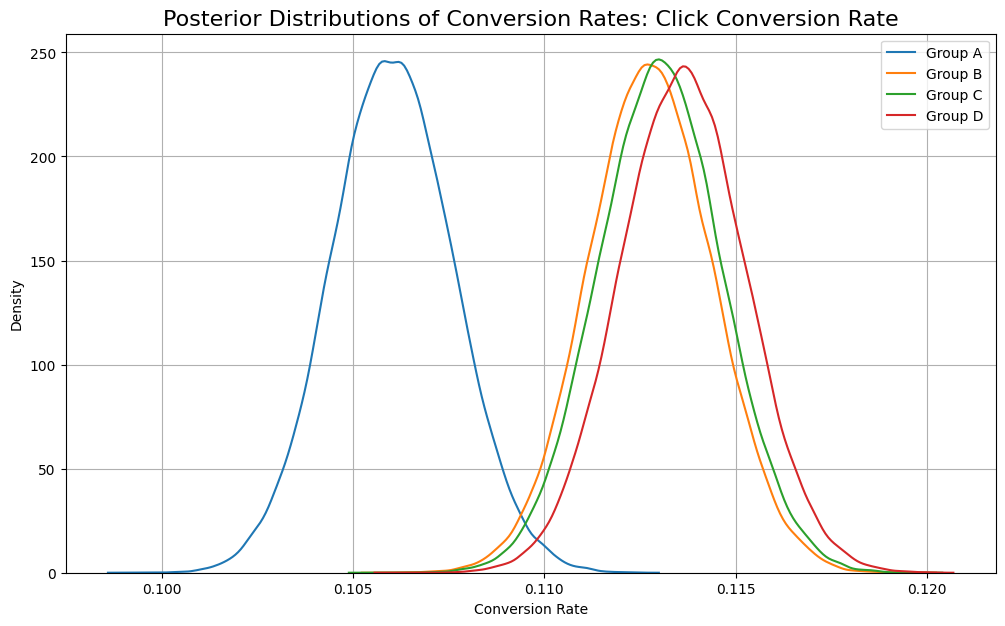


‚úÖ [Click Conversion Rate] Bayesian: Probability that each group is best
Probability that A is the best: 0.00%
Probability that B is the best: 24.04%
Probability that C is the best: 29.57%
Probability that D is the best: 46.39%

‚úÖ [Click Conversion Rate] Bayesian Pairwise Superiority Probabilities:


Comparison  P(Group1 > Group2)  P(Group1 < Group2)
0      A > B              0.0015              0.9985
1      A > C              0.0010              0.9990
2      A > D              0.0004              0.9996
3      B > C              0.4555              0.5445
4      B > D              0.3567              0.6433
5      C > D              0.3979              0.6021


[Purchase Conversion Rate]


‚úÖ [Purchase Conversion Rate] Group Summary (Successes, Trials, Conversion Rate)


Group  Successes  Trials Conversion Rate
0     A       1852   37448           4.95%
1     B       2015   37696           5.35%
2     C       1953   37682           5.18%
3     D       2031   37460           5.42%


‚úÖ [Purchase Conversion Rate] Group Conversion Rates
A group conversion rate: 4.95%
B group conversion rate: 5.35%
C group conversion rate: 5.18%
D group conversion rate: 5.42%

‚úÖ [Purchase Conversion Rate] Chi-square Test
- Chi2 statistic: 10.0760
- p-value: 0.0179

‚úÖ [Purchase Conversion Rate] Pairwise comparison (Holm-Bonferroni)


Comparison  Uncorrected p-value  Corrected p-value (Holm)  Significant
0     A vs B               0.0131                    0.0656        False
1     A vs C               0.1380                    0.5520        False
2     A vs D               0.0033                    0.0197         True
3     B vs C               0.3177                    0.6354        False
4     B vs D               0.6427                    0.6427        False
5     C vs D               0.1439                    0.5520        False


‚úÖ [Purchase Conversion Rate] Pairwise comparison (FDR)


Comparison  Uncorrected p-value  Corrected p-value (FDR)  Significant (FDR)
0     A vs B               0.0131                   0.0393               True
1     A vs C               0.1380                   0.2158              False
2     A vs D               0.0033                   0.0197               True
3     B vs C               0.3177                   0.3812              False
4     B vs D               0.6427                   0.6427              False
5     C vs D               0.1439                   0.2158              False

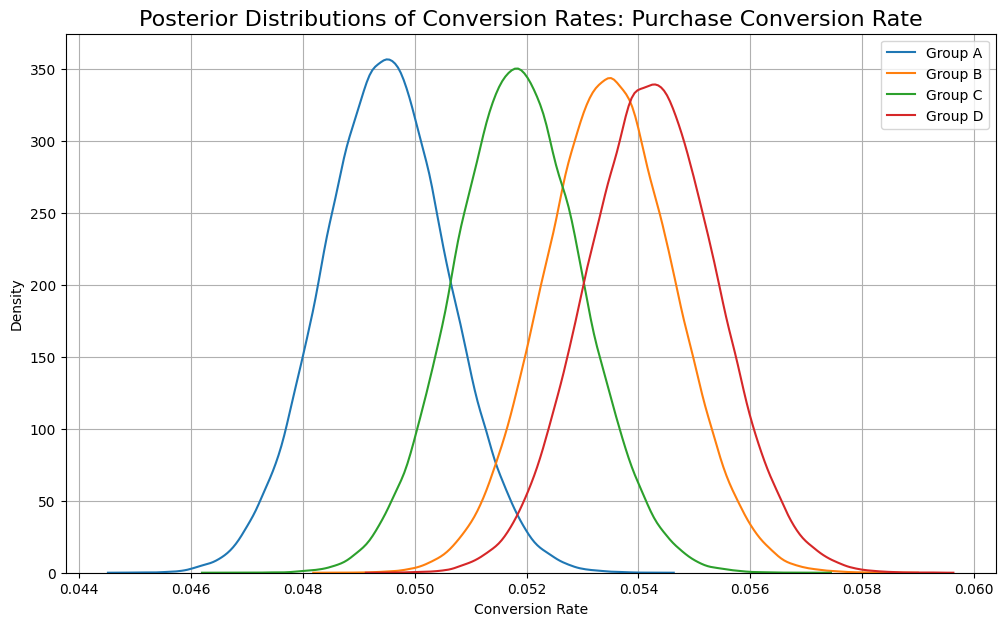


‚úÖ [Purchase Conversion Rate] Bayesian: Probability that each group is best
Probability that A is the best: 0.03%
Probability that B is the best: 30.73%
Probability that C is the best: 3.50%
Probability that D is the best: 65.74%

‚úÖ [Purchase Conversion Rate] Bayesian Pairwise Superiority Probabilities:


Comparison  P(Group1 > Group2)  P(Group1 < Group2)
0      A > B              0.0065              0.9935
1      A > C              0.0678              0.9322
2      A > D              0.0015              0.9985
3      B > C              0.8408              0.1592
4      B > D              0.3212              0.6788
5      C > D              0.0721              0.9279

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.multitest import multipletests

pd.set_option('display.float_format', '{:.4f}'.format)

def abtest_stats(groups, successes, trials, metric_name="AB Test Metric", samples=100_000):
    failures = trials - successes
    conversion_rates = successes / trials

    print(f"\n{'='*60}")
    print( f"[{metric_name}]" )
    print(f"\n{'='*60}")
    print(f"\n‚úÖ [{metric_name}] Group Summary (Successes, Trials, Conversion Rate)")
    group_summary = pd.DataFrame({
        'Group': groups,
        'Successes': successes,
        'Trials': trials,
        'Conversion Rate': pd.Series(conversion_rates).map(lambda x: f"{x*100:.2f}%")
    })
    display(group_summary)

    print(f"\n‚úÖ [{metric_name}] Group Conversion Rates")
    for grp, rate in zip(groups, conversion_rates):
        print(f"{grp} group conversion rate: {rate:.2%}")

    # Chi-square test
    contingency_table = np.array([successes, failures]).T
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"\n{'='*60}\n‚úÖ [{metric_name}] Chi-square Test")
    print(f"- Chi2 statistic: {chi2:.4f}")
    print(f"- p-value: {p_value:.4f}")

    # Pairwise z-test (Holm)
    pairwise_results, pairs = [], []
    for i in range(len(groups)):
        for j in range(i + 1, len(groups)):
            count = np.array([successes[i], successes[j]])
            nobs = np.array([trials[i], trials[j]])
            _, p = proportions_ztest(count, nobs)
            pairwise_results.append(p)
            pairs.append(f"{groups[i]} vs {groups[j]}")
    reject, pvals_corrected, _, _ = multipletests(pairwise_results, alpha=0.05, method='holm')
    results_df = pd.DataFrame({
        'Comparison': pairs,
        'Uncorrected p-value': pairwise_results,
        'Corrected p-value (Holm)': pvals_corrected,
        'Significant': reject
    })
    print(f"\n{'='*60}\n‚úÖ [{metric_name}] Pairwise comparison (Holm-Bonferroni)")
    display(results_df)

    # Pairwise z-test (FDR)
    reject_fdr, pvals_fdr_corrected, _, _ = multipletests(pairwise_results, alpha=0.05, method='fdr_bh')
    results_df_fdr = pd.DataFrame({
        'Comparison': pairs,
        'Uncorrected p-value': pairwise_results,
        'Corrected p-value (FDR)': pvals_fdr_corrected,
        'Significant (FDR)': reject_fdr
    })
    print(f"\n{'='*60}\n‚úÖ [{metric_name}] Pairwise comparison (FDR)")
    display(results_df_fdr)

    # Bayesian posterior samples
    posterior_samples = {
        g: np.random.beta(1 + s, 1 + f, samples)
        for g, s, f in zip(groups, successes, failures)
    }

    plt.figure(figsize=(12, 7))
    for g in groups:
        sns.kdeplot(posterior_samples[g], label=f'Group {g}')
    plt.title(f'Posterior Distributions of Conversion Rates: {metric_name}', fontsize=16)
    plt.xlabel('Conversion Rate')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Bayesian: Best group probabilities
    best_group_count = {g: 0 for g in groups}
    for i in range(samples):
        best = max(posterior_samples, key=lambda g: posterior_samples[g][i])
        best_group_count[best] += 1

    print(f"\n‚úÖ [{metric_name}] Bayesian: Probability that each group is best")
    for g, c in best_group_count.items():
        print(f"Probability that {g} is the best: {c / samples:.2%}")

    # Bayesian: Pairwise superiority
    pairwise_bayes = []
    for i in range(len(groups)):
        for j in range(i + 1, len(groups)):
            g1, g2 = groups[i], groups[j]
            prob = np.mean(posterior_samples[g1] > posterior_samples[g2])
            pairwise_bayes.append({
                'Comparison': f"{g1} > {g2}",
                'P(Group1 > Group2)': prob,
                'P(Group1 < Group2)': 1 - prob
            })

    df_bayes = pd.DataFrame(pairwise_bayes)
    print(f"\n{'='*60}\n‚úÖ [{metric_name}] Bayesian Pairwise Superiority Probabilities:")
    display(df_bayes)

# =====================
# ÏÇ¨Ïö© ÏòàÏãú (ÏßÄÌëúÎ≥ÑÎ°ú Í≥ÑÏÜç Ïû¨ÏÇ¨Ïö©)

groups = ['A', 'B', 'C', 'D']

# Ï≤´ Î≤àÏß∏ ÏßÄÌëú (Ïòà: ÌÅ¥Î¶≠Ï†ÑÌôòÏú®)
successes1 = np.array([3970, 4251, 4259, 4256])
trials1    = np.array([37448, 37696, 37682, 37460])
abtest_stats(groups, successes1, trials1, metric_name="Click Conversion Rate")

# Îëê Î≤àÏß∏ ÏßÄÌëú (Ïòà: Íµ¨Îß§Ï†ÑÌôòÏú®)
successes2 = np.array([1852, 2015, 1953, 2031])
trials2    = np.array([37448, 37696, 37682, 37460])
abtest_stats(groups, successes2, trials2, metric_name="Purchase Conversion Rate")




In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.multitest import multipletests

def ab_group_test(groups, successes, trials, metric_name="Metric", samples=100_000):
    failures = trials - successes
    conversion_rates = successes / trials

    # ‚úÖ metric_name ÏµúÏÉÅÎã® Ï∂úÎ†• (ÌÅ∞ Ï†úÎ™©)
    print("\n" + "#"*70)
    print(f"üìä {metric_name}\n" + "#"*70)
    
    group_summary = pd.DataFrame({
        'Group': groups,
        'Successes': successes,
        'Trials': trials,
        'Conversion Rate': pd.Series(conversion_rates).map(lambda x: f"{x*100:.2f}%")
    })
    print("\n‚úÖ Group Summary (Successes, Trials, Conversion Rate)")
    display(group_summary)
    print(f"\n{'='*60}")

    # for grp, rate in zip(groups, conversion_rates):
    #     print(f"{grp} group conversion rate: {rate:.2%}")

    # Chi-square test
    contingency_table = np.array([successes, failures]).T
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print("\n‚úÖ Chi-square Test")
    print(f"- Chi2 statistic: {chi2:.4f}")
    print(f"- p-value: {p_value:.4f}")
    print(f"\n{'='*60}")

    # Pairwise Z-test (Holm-Bonferroni)
    pairwise_results, pairs = [], []
    for i in range(len(groups)):
        for j in range(i + 1, len(groups)):
            count = np.array([successes[i], successes[j]])
            nobs = np.array([trials[i], trials[j]])
            _, p = proportions_ztest(count, nobs)
            pairwise_results.append(p)
            pairs.append(f"{groups[i]} vs {groups[j]}")

    reject, pvals_corrected, _, _ = multipletests(pairwise_results, alpha=0.05, method='holm')
    results_df = pd.DataFrame({
        'Comparison': pairs,
        'Uncorrected p-value': pairwise_results,
        'Corrected p-value (Holm)': pvals_corrected,
        'Significant': reject
    })
    print("\n‚úÖ Pairwise Z-test (Holm-Bonferroni):")
    display(results_df)
    print(f"\n{'='*60}")

    # Pairwise Z-test (FDR)
    reject_fdr, pvals_fdr_corrected, _, _ = multipletests(pairwise_results, alpha=0.05, method='fdr_bh')
    results_df_fdr = pd.DataFrame({
        'Comparison': pairs,
        'Uncorrected p-value': pairwise_results,
        'Corrected p-value (FDR)': pvals_fdr_corrected,
        'Significant (FDR)': reject_fdr
    })
    print("\n‚úÖ Pairwise Z-test (FDR - Benjamini-Hochberg):")
    display(results_df_fdr)
    print(f"\n{'='*60}")

    # Bayesian analysis
    posterior_samples = {
        group: np.random.beta(1 + success, 1 + fail, samples)
        for group, success, fail in zip(groups, successes, failures)
    }

    plt.figure(figsize=(12, 7))
    for group in groups:
        sns.kdeplot(posterior_samples[group], label=f'Group {group}')
    plt.title('Posterior Distributions of Conversion Rates', fontsize=16)
    plt.xlabel('Conversion Rate')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()
    print(f"\n{'='*60}")

    best_group_count = {group: 0 for group in groups}
    for i in range(samples):
        best_group = max(posterior_samples, key=lambda g: posterior_samples[g][i])
        best_group_count[best_group] += 1

    print("\n‚úÖ Bayesian: Probability that each group is best")
    for group, count in best_group_count.items():
        prob = count / samples
        print(f"Probability that {group} is the best: {prob:.2%}")
    print(f"\n{'='*60}")

    # Bayesian pairwise superiority
    pairwise_bayes = []
    for i in range(len(groups)):
        for j in range(i + 1, len(groups)):
            g1, g2 = groups[i], groups[j]
            prob = np.mean(posterior_samples[g1] > posterior_samples[g2])
            pairwise_bayes.append({
                'Comparison': f"{g1} > {g2}",
                'P(Group1 > Group2)': prob,
                'P(Group1 < Group2)': 1 - prob
            })
    df_bayes = pd.DataFrame(pairwise_bayes)
    print("\n‚úÖ Bayesian Pairwise Superiority Probabilities:")
    display(df_bayes)
    print(f"\n{'='*60}")



######################################################################
üìä Estimate Conversion Rate
######################################################################

‚úÖ Group Summary (Successes, Trials, Conversion Rate)


Group  Successes  Trials Conversion Rate
0     A       3970   37448          10.60%
1     B       4251   37696          11.28%
2     C       4259   37682          11.30%
3     D       4256   37460          11.36%



‚úÖ Chi-square Test
- Chi2 statistic: 14.5537
- p-value: 0.0022


‚úÖ Pairwise Z-test (Holm-Bonferroni):


Comparison  Uncorrected p-value  Corrected p-value (Holm)  Significant
0     A vs B               0.0030                    0.0120         True
1     A vs C               0.0021                    0.0105         True
2     A vs D               0.0009                    0.0053         True
3     B vs C               0.9122                    1.0000        False
4     B vs D               0.7150                    1.0000        False
5     C vs D               0.7987                    1.0000        False



‚úÖ Pairwise Z-test (FDR - Benjamini-Hochberg):


Comparison  Uncorrected p-value  Corrected p-value (FDR)  Significant (FDR)
0     A vs B               0.0030                   0.0060               True
1     A vs C               0.0021                   0.0060               True
2     A vs D               0.0009                   0.0053               True
3     B vs C               0.9122                   0.9122              False
4     B vs D               0.7150                   0.9122              False
5     C vs D               0.7987                   0.9122              False

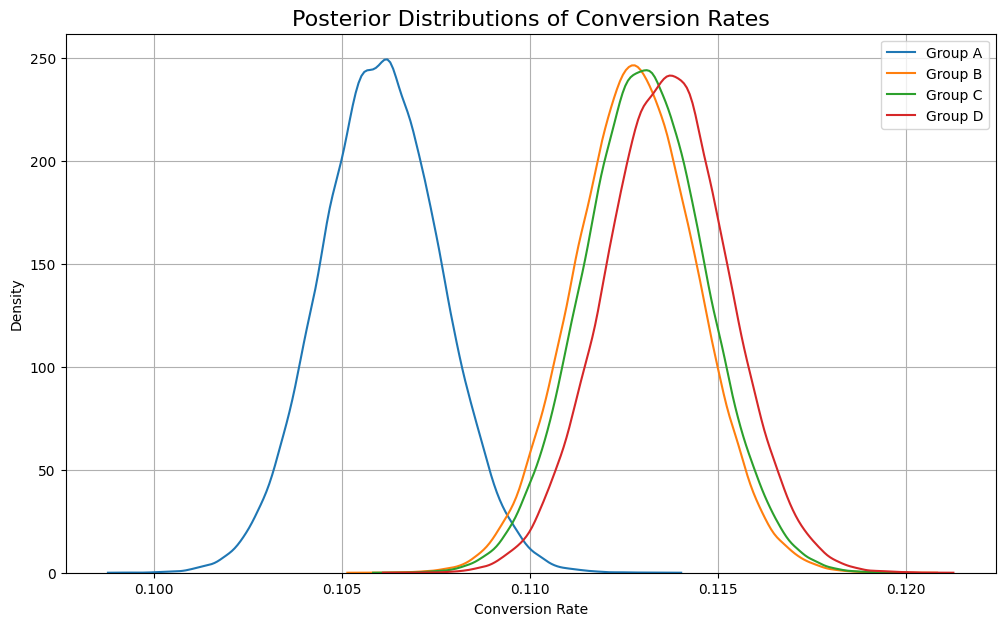



‚úÖ Bayesian: Probability that each group is best
Probability that A is the best: 0.00%
Probability that B is the best: 24.35%
Probability that C is the best: 29.53%
Probability that D is the best: 46.11%


‚úÖ Bayesian Pairwise Superiority Probabilities:


Comparison  P(Group1 > Group2)  P(Group1 < Group2)
0      A > B              0.0016              0.9984
1      A > C              0.0011              0.9989
2      A > D              0.0005              0.9995
3      B > C              0.4585              0.5415
4      B > D              0.3602              0.6398
5      C > D              0.3984              0.6016

In [5]:
groups = ['A', 'B', 'C', 'D']
successes = np.array([3970, 4251, 4259, 4256])
trials = np.array([37448, 37696, 37682, 37460])

ab_group_test(groups, successes, trials, metric_name="Estimate Conversion Rate")
